In [8]:
# '''
# @file GPfSI_run.ipynb
# @brief Jupyter notebook file to configure and excute GPfSI 
# Copyright (C) 2021 Jinwoo Im
# Sonny Astani Department of Civil and Environmental Engineering, University of Southern California, Los Angeles, USA
# 
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
# 
# You should have received a copy of the GNU General Public License
# along with this program. If not, see <https://www.gnu.org/licenses/>.
# 
# This is the Jupyter notebook file to configure and execute Genetic Programing for System Identification (GPfSI).
# '''




In [ ]:
    <one line to give the program's name and a brief idea of what it does.>
    Copyright (C) <year>  <name of author>

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [9]:
# Necessary Modules ("numpy", "pandas", "sympy", "time", "multiprocessing", "os", "sys") 
# Please install "sympy" library

import numpy as np
import sympy
from sympy import *
import GPfSI
import GPfSI_expressiontree as GPfSI_et
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import csv


In [10]:
# General information of GPfSI simulation

case_number = 1 # integer
# case_number is used for the filename

infomation = True # True or False
# If you want to see relevant information in each step, you can set it True. 

core_number = 2 # interger or None (which uses all available cores)
randomseed = 1 # interger or None
saveinterval = 10 # integer
generation_continues = None # integer or None
case_parameters = [ case_number, infomation, core_number, randomseed, saveinterval, generation_continues ]




In [11]:
# Information for a reference system model
# Need user's prior knowledge of the system

model_number = 1 # integer 1 or 2
# If you want to make try Harmonic oscillator equation (an 1D ODE example), set model_number to 1.
# If you want to make try Heat equation (an 1D PDE example), set model_number to 2.

error_level = 0.05 # float number, e.g., 0.01, 0.05, 0.1

reference_model = [ model_number, error_level ]




In [12]:
# Hyperparameters of GPfSI simulation
# Important factors are compelxity penalty coefficient and basis functions

# for fitness test

number_session = 2 # integer 1 or 2
# the number of fitness test sessions

fitnesstype1 = [ False, True, 0.005, 0.1, 1]
fitnesstype2 = [ True, False, 0.005, 0.1, 1] # if number_session is 2
# fitnesstype = [ equation error, solution error, compelxity penalty coefficient, 
#                 sampling portion of the data, subbatch number]

termination_condition1 = [ 0.001, 50 ]
termination_condition2 = [ 0.001, 50 ] # if number_session is 2
# termination_condition = [ minimum fitness change, consecutive generation ]

# for expression tree (genetic programming)

method_generation = 'ramped half-and-half' # 'ramped half-and-half', 'grow', or 'full'
operations = [ '+', '-', '*' ]
basis_functions = [ 'Heaviside', 'sign', 'Abs', 'exp', 'erf' , 'sin', 'cos', 'log' ]
# e.g., [ 'Heaviside', 'sign', 'Abs', 'exp', 'erf' , 'sin', 'cos', 'log' ]
# check available options (https://docs.sympy.org/latest/modules/functions/index.html)

if model_number == 1:
    variables = ['X', 'Xt']
else:
    variables = ['X', 'Xx', 'Xxx'] # input variables
# ['X', 'Xt'] if the model number is 1
# ['X', 'Xx', 'Xxx'] if the model number is 2

tree_weight = [5,1,2,2] # integers; node-seminode-variable-number
tree_level = 5 # integer; level limit = 2**tree_level - 1
number_population = 100 # integer
representation_rate = 0.1 # float
crossover_rate = 0.8 # float
mutation_rate = 0.2 # float
evolution_parameters = [ representation_rate, crossover_rate, mutation_rate ]
expressiontree_parameters = [ method_generation, operations, basis_functions, variables,
                             tree_weight, tree_level, number_population, evolution_parameters ]


# for coefficient optimization (genetic algorithm)

GA_frequency_optimization = 50
GA_apply_equations = 20
GA_number_population = 30
GA_tolerance_function = [0.01, 30]
training_parameters = [ number_session, [fitnesstype1, fitnesstype2], 
                       [termination_condition1, termination_condition2],
                       GA_frequency_optimization, GA_apply_equations, GA_number_population, GA_tolerance_function]




GPfSI case 1 initializaiton with 2 core(s)
GPfSI starts with random seed 1
Initial condition for training data


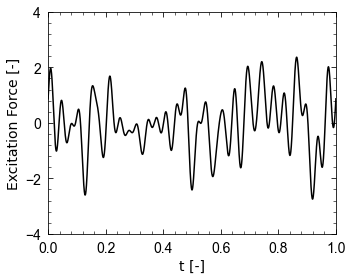

Processing responses:  0 %
Processing responses:  20 %
Processing responses:  40 %
Processing responses:  60 %
Processing responses:  80 %
Processing responses:  100 %
True
Reference responses


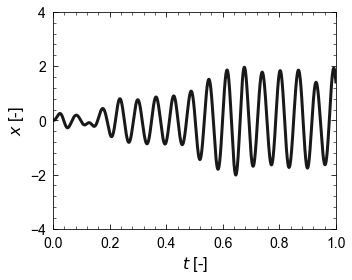

Error calculation ... ( 1 / 3 )
Error calculation ... ( 2 / 3 )
Error calculation ... ( 3 / 3 )
Error level in training data is 5.0 %
Generation 1 initialized ...
Initialization method is ramped half-and-half
0 % generation
20 % generation
40 % generation
60 % generation
80 % generation
100 % generation
0 % generation
20 % generation
40 % generation
60 % generation
80 % generation
100 % generation
10 sample equations
1 :  ((Xt)+(0.108174))
2 :  ((((Xt)*(-1.0))+((X)*(-1.0)))+(-0.358616))
3 :  (((X)*(1.18717))+(0.098498))
4 :  ((Xt)+(0.478277))
5 :  ((((((((X)*(X))*(-0.896184))+(((Xt)*(Xt))*(0.305594)))+(((Xt)*(X))*(0.59059)))+((Xt)*(-0.618392)))+((X)*(0.878952)))+(-0.14844))
6 :  ((((((X)*(X))*(Xt))*(1.542088))+((((Xt)*(Xt))*(X))*(0.771044)))+(X))
7 :  ((((X)*(0.200893))+((Xt)*(2.0)))+(0.890565))
8 :  ((log(sign((X)))+(Xt))+(0.139147))
9 :  ((Xt)*(0.440706))
10 :  (((X)*(3.39242))+(-1.996323))
Fitness test for  100  equations
Fitness type is ['solution error', 'complexity penalty']
1 su

Processing responses:  20 %
Processing responses:  20 %
Processing responses:  40 %
Processing responses:  40 %
Processing responses:  60 %
Processing responses:  60 %
Processing responses:  80 %
Processing responses:  80 %
Processing responses:  100 %
Equation number  28  is done
Processing responses:  0 %
Processing responses:  100 %
Equation number  29  is done
Processing responses:  0 %
Equation number  31  is failed
Equation number 31 is Xt + 0.75144
Processing responses:  Processing responses: 20  0%
 %
Processing responses:  40 %Processing responses:  20 %

Processing responses:  40 %
Processing responses:  60 %
Processing responses:  80 Processing responses: % 60
 %
Processing responses:  80 %
Processing responses:  100 %
Equation number  30  is done
Processing responses:  0 %
Processing responses:  100 %
Equation number  31  is done
Processing responses:  20Processing responses:   0 %
%
Processing responses:  40Processing responses:   %20
 %
Processing responses:  60 %
Process

Processing responses:  100 %Processing responses: 
 Equation number 20  %55 
 is done
Processing responses:  0 %
Processing responses:  40 %
Processing responses:  20 %
Processing responses:  60 %
Processing responses:  40 %
Processing responses:  80 %
Processing responses:  60 %
Processing responses:  100 %
Equation number  56  is done
Processing responses:  0 %Processing responses: 
 80Equation number   58% 
 is failed
Equation number 58 is -0.0757820000000000
Processing responses:  0 %
Processing responses:  100 %
Equation number Processing responses:  57  20 is done
 %
Equation number  59  is failed
Equation number 59Processing responses:   40is  %
X*Xt**2 - 0.314136*X*Xt - 0.069057*Xt**2 + 0.021693*Xt
Processing responses:  0 %
Equation number  59 Processing responses:  is failed 
60 %Equation number
 59 is 0.466666000000000
Processing responses:  0 Processing responses:  %80
 %
Processing responses:  20 %
Processing responses:  100 %
Equation number  58  is done
Processing respon

 is doneEquation number  
83Processing responses:   is done 0
 Processing responses: % 
0 %
Processing responses: Processing responses:   2020  %%

Processing responses: Processing responses:  40  40% %

Processing responses: Processing responses:   6060  %%

Processing responses: Processing responses:   8080  %%

Processing responses: Processing responses:   100 100% 
%
Equation number Equation number   8485   is done
 is done
Processing responses:  Processing responses: 0  %0 
Equation number %
 86  is failed
Equation number 86 is Processing responses:  20 %
Processing responses:  40 %
Processing responses:  60 %
Processing responses: 0.636277*Xt - 0.133906
 80 Processing responses: % 
0 %
Processing responses: Processing responses:   10020  %
%
Equation number  87  is done
Processing responses:  0 %
Processing responses:  40 %
Processing responses:  20 Processing responses: % 
60 %
Processing responses:  40 Processing responses: %
 80 %
Processing responses:  60 %
Processing respons

/Users/jinwooim/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Generation 1: fitness test
Generation 2: evolution
Generation 2: fitness test
Generation 3: evolution
Generation 3: fitness test
Generation 4: evolution
Generation 4: fitness test
Generation 5: evolution
Generation 5: fitness test
Generation 6: evolution
Generation 6: fitness test
Generation 7: evolution
Generation 7: fitness test
Generation 8: evolution
Generation 8: fitness test
Generation 9: evolution
Generation 9: fitness test
Generation 10 / Time laps 79 s
Best 5 equations
Xt*sign(X) + 0.34623*Xt / 0.745655
X*Abs(X) / 0.828091
X / 0.864872
X - 0.005501 / 0.877003
sin(1.0*Xt) / 0.933967

Generation 10: evolution
Generation 10: fitness test
Generation 11: evolution
Generation 11: fitness test
Generation 12: evolution
Generation 12: fitness test
Generation 13: evolution
Generation 13: fitness test
Generation 14: evolution
Generation 14: fitness test
Generation 15: evolution
Generation 15: fitness test
Generation 16: evolution
Generation 16: fitness test
Generation 17: evolution
Gener

maximum_change_fitness 0.012822 over 30 consecutive generations
maximum_change_fitness 0.022649 over 30 consecutive generations
maximum_change_fitness 0.012822 over 30 consecutive generations
maximum_change_fitness 0.022649 over 30 consecutive generations
maximum_change_fitness 0.012822 over 30 consecutive generations
maximum_change_fitness 0.022649 over 30 consecutive generations
maximum_change_fitness 0.012822 over 30 consecutive generations
maximum_change_fitness 0.022649 over 30 consecutive generations
maximum_change_fitness 0.012822 over 30 consecutive generations
maximum_change_fitness 0.022649 over 30 consecutive generations
maximum_change_fitness 0.022649 over 30 consecutive generations
maximum_change_fitness 0.012822 over 30 consecutive generations
maximum_change_fitness 0.022649 over 30 consecutive generations
maximum_change_fitness 0.012822 over 30 consecutive generations
maximum_change_fitness 0.022649 over 30 consecutive generations
maximum_change_fitness 0.012822 over 30 

maximum_change_fitness 0.039795 over 30 consecutive generations
maximum_change_fitness 0.039795 over 30 consecutive generations
maximum_change_fitness 0.039795 over 30 consecutive generations
maximum_change_fitness 0.039795 over 30 consecutive generations
maximum_change_fitness 0.039795 over 30 consecutive generations
maximum_change_fitness 0.039795 over 30 consecutive generations
maximum_change_fitness 0.002152 over 30 consecutive generations
equation 19 is done with fitness 0.057953 at generation 44 

maximum_change_fitness 0.011129 over 30 consecutive generations
maximum_change_fitness 0.011129 over 30 consecutive generations
maximum_change_fitness 0.011129 over 30 consecutive generations
maximum_change_fitness 0.011129 over 30 consecutive generations
maximum_change_fitness 0.011129 over 30 consecutive generations
maximum_change_fitness 0.011129 over 30 consecutive generations
maximum_change_fitness 0.011129 over 30 consecutive generations
maximum_change_fitness 0.011129 over 30 con

maximum_change_fitness 4e-06 over 30 consecutive generations
equation 7 is done with fitness 0.060685 at generation 31 

equation 9 starts with 9.974311*X + 0.03993*erf(X) 0.065598
maximum_change_fitness 0.000991 over 30 consecutive generations
equation 8 is done with fitness 0.0582 at generation 31 

equation 10 starts with -0.000532*X**2 + 9.973731*X 0.06071
maximum_change_fitness 0.001615 over 30 consecutive generations
equation 9 is done with fitness 0.062756 at generation 31 

equation 11 starts with X**2 + 9.973779*X 0.266113
maximum_change_fitness 0.007925 over 30 consecutive generations
equation 10 is done with fitness 0.05264 at generation 31 

equation 12 starts with 9.974311*X + 0.03993*erf(sin(X)) 0.065
maximum_change_fitness 0.011313 over 30 consecutive generations
maximum_change_fitness 0.011313 over 30 consecutive generations
maximum_change_fitness 0.011313 over 30 consecutive generations
maximum_change_fitness 0.011313 over 30 consecutive generations
maximum_change_fitn

In [ ]:
# Excution the whold GPfSI simulation with one function

GPfSI_results = GPfSI.GPfSI_allinone(case_parameters, reference_model, training_parameters, expressiontree_parameters)



In [ ]:
# Plot results

case = 1
session = 2

saved_data = np.load(f'results/final_case_{case}_session_{session}.npy', allow_pickle = True)
generations = saved_data[0]
bestequations = saved_data[1]
bestfitness = saved_data[2]
generation = generations[-1]
minimums_bestfitness = saved_data[3]
equations = saved_data[4][0]
fitness_info = saved_data[4][1]
computationaltimes = saved_data[5]
generation_offsets = saved_data[6]
np.random.set_state(saved_data[7])

saved_configuration = np.load(f'results/initial_case_{case}_configuration.npy', allow_pickle = True)
case_parameters = saved_configuration[0]
reference_model = saved_configuration[1]
training_parameters = saved_configuration[2]
expressiontree_parameters = saved_configuration[3]


# Loss function over time

mildstones=[]    
print('each seesion end')   
for i in generation_offsets:
    mildstones.append(bestequations[i-1])
    print(f'best at gen. {i}: {bestequations[i-1].eqn_print()} // {bestfitness[i-1]}')
    
complexity = []
for j in range(len(bestequations)):
    complexity.append(GPfSI_et.counting_components(bestequations[j]))
complexity = np.array(complexity)
complexityterm = complexity*training_parameters[1][0][2]
rest = bestfitness - complexityterm

ymin = 1e-3
ymax = 1e1
fig, ax = plt.subplots(figsize=(10,3))
plt.vlines(generation_offsets, ymin, ymax, linewidth = 3, colors='cyan', label='Phase ends')
plt.plot(generations, bestfitness, linewidth = 2, linestyle = '-', alpha = 0.8, color='k', label=r'Loss function')
plt.plot(generations, rest, linewidth = 2, linestyle = ':', alpha = 0.8, color='k', label=r'Training error')
plt.plot(generations, complexityterm, linewidth = 2, alpha = 0.8, color='b', label=r'Complexity penalty')
plt.xlim(0,len(generations))
plt.ylim(ymin, ymax)
plt.yscale('log')
plt.xlabel(r'Genration [-]', fontsize=18, fontname='Arial')
plt.ylabel(r'Value [-]', fontsize=18, fontname='Arial')
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.tick_params(which="major", direction="in", right=True, top=True, length=6, width=1)
ax.tick_params(which="minor", direction="in", right=True, top=True, length=4, width=1)
plt.legend(prop={'family': 'Arial', 'size': 12}, loc=1)
plt.tight_layout()
plt.savefig(f'results/lossfunction_case_{case}.pdf',dpi=200, bbox_inches='tight')
plt.show()

# Top 5 models

print('top 10 models w/ loss function values')
for i in range(10):
    print(f'{i+1}: {equations[i].eqn_print()} // {fitness_info[i]}')

# texts save to csv    
    
with open(f'results/result_outline_case_{case}.csv', 'w', newline='') as csvfile:
    result_csv = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    result_csv.writerow(['Model 1 is r(X, Xt) in "f(t) = m*Xtt + r(X, Xt)"'])
    result_csv.writerow(['Model 2 is M(X, Xx, Xxx) in "Xt = M(X, Xx, Xxx)"'])
    result_csv.writerow([' '])
    result_csv.writerow(['each seesion end'])
    for i in generation_offsets:
        result_csv.writerow([f'best at gen. {i}: {bestequations[i-1].eqn_print()} // {bestfitness[i-1]}'])
    result_csv.writerow([' '])
    result_csv.writerow(['top 10 models w/ loss function values'])
    for i in range(10):
        result_csv.writerow([f'{i+1}: {equations[i].eqn_print()} // {fitness_info[i]}'])
    csvfile.close()    
    